# Neural Networks
*July 2018*

*The Center of Applied Data Science*

<a id='Table_of_Content'></a>

* ** [1. Neural Networks](#1.Neural_Networks)** 
 * [1.1. Perceptron](#1.1.Perceptron)
 * [1.2. Sigmoid](#1.2.Sigmoid)
* ** [2. Neural Networks Architecture](#2.Neural_Networks_Architecture)** 
* ** [3. Training Neural Network](#3.Training_Neural_Network)**
 * [3.1. Forward Propagation](#3.1.Forward_Propagation)
 * [3.2. Compute Error](#3.2.Compute_Error)
 * [3.3. Back Propagation](#3.3.Back_Propagation)
 * [3.4. Gradient Descent](#3.4.Gradient_Descent)
 * [3.5. Computational Graph](#3.5.Computational_Graph)
 * [3.6. Gradient_Checking](#3.6.Gradient_Checking)
 * [3.7. Parameter Update](#3.7.Parameter_Update)
 * [3.8. Learning Rate](#3.8.Learning_Rate)



<a id='1.Neural_Networks'></a>

# 1. Neural Networks



Neural networks (NN) are a broad family of algorithms that have formed the basis for the recent resurgence in the computational field called deep learning. Early work on neural networks actually began in the 1950s and 60s. And just recently, neural network has experienced a resurgence of interest, as deep learning has achieved impressive state-of-the-art results. 

Neural network is basically a mathematical model built from simple functions with changing parameters. Just like a biological neuron has dendrites to receive signals, a cell body to process them, and an axon to send signals out to other neurons, an artificial neuron has a number of input channels, a processing stage, and one output that can branch out to multiple other artificial neurons. Neurons are interconnected and pass message to each other.

To understand neural networks, Let's get started with **Perceptron**.

<center><img src="images/neurons.png" alt="neuron" width="500px"/></center>

<a id='1.1.Perceptron'></a>

## 1.1. Perceptron

A perceptron takes several binary inputs, $x_1,x_2,…,x_n$, and produces a single binary output.

<center><img src="images/perceptron.png" alt="neuron" width="300px"/></center>

The example above shows a perceptron taking three inputs $x_1, x_2, x_3$. Each input is given a $weight$ $W \in \mathbb{R}$ and it serves to express the importance of its corresponding input in the computation of output for that perceptron. The perceptron output, 0 or 1, is determined by the weighted sum $\sum_i w_ix_i$ with respect to a $threshold$ value as follows:

\begin{equation}
    output = \left\{
            \begin{array}{rl}
            0 & \text{if } \sum_iw_ix_i \leq \text{threshold}\\
            1 & \text{if } \sum_iw_ix_i > \text{threshold}
            \end{array} \right.
\end{equation}

The weighted sum can be categorically defined as a dot product between $w$ and $x$ as follows: 

$$\sum_i w_ix_i \equiv w \cdot x$$

where $w$ and $x$ are vectors corresponding to weights and inputs respectively. Introducing a bias term $b \equiv -threshold$ results in

\begin{equation}
    output = \left\{
            \begin{array}{rl}
            0 & \text{if } w \cdot x + b \leq 0\\
            1 & \text{if } w \cdot x + b > 0
            \end{array} \right.
\end{equation}

You can think of the $bias$ as a measure of how easy it is to get the perceptron to output 1. For a perceptron with a high positive $bias$, it is extremely easy for the perceptron to output 1. In constrast, if the $bias$ is relatively  a negative value, it is difficult for the perceptron to output 1.

<center><img src="images/perceptron2.png" alt="neuron" width="300px"/></center>

A way to think about the perceptron is that it is a device that makes **decisions** by weighing up evidence. 

*What is dot product?*

#### Perceptron Exercise
For example, you have datastar class on Saturday and you want to use a perceptron model to decide whether or not to attend. Three factors to consider:
- Is it machine learning class?
- Is my friend going?
- Is the weather good?

Use binary variables $x_1, x_2, x_3$ to represent these three factors. For example, $x_1 = 1$ if it is a machine learning class, $x_1 = 0$ if it is not.

In [2]:
import numpy as np
X = np.array([0, 1, 1])
W = np.array([5, 1, -3])
b=5

def perceptron_neuron(X, W, b):
    return int(X.dot(W)+b > 0)

perceptron_neuron(X,W,b)

1

<a id='1.2.Sigmoid'></a>
## 1.2. Sigmoid 

Small changes to $weights$ and $bias$ of any perceptron in a network can cause the output to flip from 0 to 1 or 1 to 0. This flip can cause the behaviour of the rest of the network to change in a complicated way.

In [3]:
x = np.array([100])
b = np.array([9])
w1 = np.array([-0.08])
w2 = np.array([-0.09])

print(perceptron_neuron(x,w1,b))
print(perceptron_neuron(x,w2,b))


1
0


The problem above can be overcome by using a Sigmoid neuron. It functions similarly to a Perceptron but modified such that small changes in $weights$ and $bias$ cause only a small change in the output.

As with a Perceptron, a Sigmoid neuron also computes $w \cdot x + b $, but now with the Sigmoid function being incorporated as follows:

\begin{equation}
    z = w \cdot x + b \\
    \sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

<center><img src="images/sigmoid_neuron.png" alt="neuron" width="500px"/></center>

A Sigmoid function produces output between 0 and 1, and the figure below shows  the function. If $z$ is large and positive, the output of a sigmoid neuron approximates to 1, just as it would for a perceptron. Alternatively if $z$ is highly negative, the output approxiates to 0.

<center><img src="images/sigmoid_shape.png" alt="neuron" width="400px"/></center>

In [4]:
#exercise
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_neuron(X, W, b):
    z = X.dot(W)+b
    return sigmoid(z)

print(sigmoid_neuron(x,w1,b))
print(sigmoid_neuron(x,w2,b))

[0.73105858]
[0.5]


Click here to go back [Table of Content](#Table_of_Content).

<a id='2.Neural_Networks_Architecture'></a>
                         
# 2. Neural Networks Architecture

A neural network can take many forms. A typical architecture consists of an input layer (leftmost), an output layer (rightmost), and a middle layer (hidden layer). Each layer can have multiple neurons while the number of neurons in the output layer is dependent on the number of classes.

<center><img src="images/neuralnetworks.png" alt="neuron" width="600px"/></center>


Click here to go back [Table of Content](#Table_of_Content).

<a id='3.Training_Neural_Network'></a>

## 3. Training Neural Network

Previously we have learnt that $weights$ express the importance of variables, and $bias$ is a threshold to control the behaviour of neurons. So, how can we determine these $weights$ and $bias$?

Consider these steps: 
1. Since we do not know the ideal $weights$ and $bias$, we initialize them using random numbers.
2. Let the data flow through the network with these initialized $weights$ and $bias$ to get a predicted output. This process is known as **forward propagation**.
3. Compare the predicted output with the actual output. An error is computed if there is a difference between them. A high error thus indicates that current $weights$ and $bias$ do not give an accurate prediction.
4. To fix these $weights$ and $bias$, a backward computation is carried out by finding the partial derivative of error with respect to each $weight$ and $bias$ and then updating their values accordingly. This process is known as **backpropagation**.
5. Repeat steps (2) to (4) until the error is below a pre-defined threshold to obtain the optimized $weights$ and $bias$.


<a id='3.1.Forward_Propagation'></a>

### 3.1. Forward Propagation

<center><img src="images/network2.png" alt="neuron" width="400px"/></center>

The model above has two neurons in the input layer, four neurons (also known as **activation units**) in the hidden layer, and one neuron in the output layer. 

$X = [x_1, x_2]$ is the input matrix

$W^j =$ matrix of $weights$ controlling function mapping from layer $j$ to layer $j + 1$ 

\begin{align}
     W^j \equiv 
\begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22} \\
w_{31} & w_{32} \\
w_{41} & w_{42} \\
\end{bmatrix}^j
\end{align}
$W^j_{kl}$, $k$ is node in layer $j+1$, $l$ is node in layer $j$

$B^j = $ matrix of $bias$ controlling function mapping from layer $j$ to layer $j + 1$

\begin{align}
     B^j \equiv 
\begin{bmatrix}
b_{1} & b_{2} & b_{3} & b_{4} 
\end{bmatrix}^j
\end{align}

$B^j_k$, $k$ is node in layer $j + 1$

the activation units can be label as $a_i^j =$ "activation" of unit $i$ in layer $j$. In this case, $i=1,2,3,4, \quad j=2$.

\begin{align}
     a_1^2 = \sigma(W_{11}^1x_1+W_{12}^1x_2+B^1_{1}) \\
     a_2^2 = \sigma(W_{21}^1x_1+W_{22}^1x_2+B^1_{2}) \\
     a_3^2 = \sigma(W_{31}^1x_1+W_{32}^1x_2+B^1_{3}) \\
     a_4^2 = \sigma(W_{41}^1x_1+W_{42}^1x_2+B^1_{4})
\end{align}

\begin{align}
     a^2 = \sigma(X \cdot W^{1T}+B^1) \\
\end{align}

\begin{align}
     output = \sigma( a^2 \cdot W^{2T}+B^2) \\
\end{align}

In [14]:
w = np.array([1])
b = np.array([-5])

for i in range(10):
    i_array = np.array([i+1])
    print(i_array, sigmoid_neuron(i_array,w,b).round())

[1] [0.]
[2] [0.]
[3] [0.]
[4] [0.]
[5] [0.]
[6] [1.]
[7] [1.]
[8] [1.]
[9] [1.]
[10] [1.]


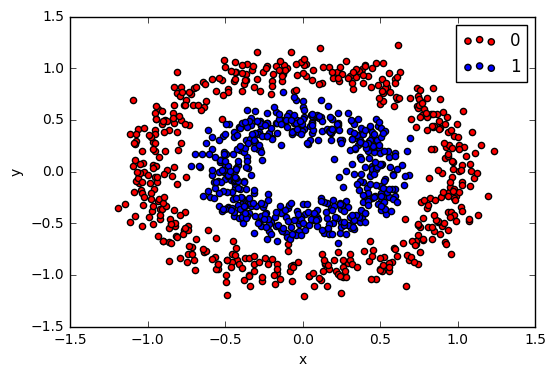

X1        X2    y
0 -0.069880  0.508880  1.0
1 -0.931794  0.607796  0.0
2  0.491890  0.223038  1.0
3 -0.504970 -0.008646  1.0
4  0.400230  1.035462  0.0

In [92]:
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
%matplotlib inline

X, y = make_circles(n_samples=1000, factor=.5, noise=.1)

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}

fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

data = np.concatenate([X,y.reshape(-1,1)], axis = 1)
pd.DataFrame(data, columns=['X1', 'X2', 'y']).head()

Implement forward propagation and feed in the generated data

Tips:
- Using numpy function *random.randn()* to generate a Gaussian distribution with mean 0, and variance 1.

In [25]:
#Exercise, Compute Forward Propagation

np.random.seed(0)
x_ = np.array([X[0]])
y_ = np.array([y[0]])

params = {
    'W1': np.random.randn(4,2),
    'B1': np.random.randn(1,4),
    'W2': np.random.randn(1,4),
    'B2': np.random.randn(1,1),
}

H = sigmoid(x_.dot(params['W1'].T)+params['B1'])
output = sigmoid(H.dot(params['W2'].T)+params['B2'])
print(output)

print('Exact output: ', y_)
print('Predicted output: ',output) 

[[0.95063174]]
Exact output:  [1]
Predicted output:  [[0.95063174]]


<a id='3.2.Compute_Error'></a>

### 3.2. Compute Error

Error is also known as Loss or Cost.

To compute the error, we should first define a $loss$ $function$. For simplicity, we will use ** One Half Mean Squared Error** as our loss function. The equation is listed below:

\begin{equation}
    MSE = \frac{1}{2n} \sum (\hat y - y)^2
\end{equation}

where $n$ is the number of training samples, $\hat y$ is the predicted output, and $y$ is the actual output. A low loss results is returned if the predicted output is close to the actual output, which indicates a good measure of accuracy. 

In [26]:
# implement the loss function
def MSE(yhat, y):
    n = yhat.shape[0]
    return (1/(2*n)) * np.sum(np.square(yhat-y))

MSE(output, y)

226.5344835250614

<a id='3.3.Back_Propagation'></a>

### 3.3. Back Propagation

Now we know that to get a good prediction, the loss should be as low/small as possible. To minimize the loss, we have to tune the $weights$ and $bias$, but how can we do that? Do we go with random trial and error or is there a better way to do it? Fortunately, there is a better way and it is called **Gradient Descent**.



<a id='3.4.Gradient_Descent'></a>

### 3.4. Gradient Descent

Gradient descent is an optimization algorithm that iteratively looks for optimal $weights$ and $bias$ so that the loss gets smaller and eventually equals zero. 

In the interative process, the gradient (of the loss function with respect to $weights$ and $bias$) is computed. The gradient is the change in loss when $weights$ and $bias$ are changed. This helps us update $weights$ and $bias$ in the direction in which the loss is minimized.

Let's recall the forward propagation equation:

\begin{align}
     a^2 = \sigma(X \cdot W^{1T}+B^1) \\
     output = \sigma( a^2 \cdot W^{2T}+B^2) \\
     loss = \frac{1}{2n} \sum (output - y)^2
\end{align}

Arrange them into a single equation, and $loss$, $L$ can be defined as follows:

\begin{align}
     L = \frac{1}{2n} \sum (\sigma( \sigma(X \cdot W^{1T}+B^1) \cdot W^{2T}+B^2)  - y)^2
\end{align}

From the equation, we want to find the gradient or derivative of $L$ with respect to $W^1, W^2, B^1, B^2$.
\begin{align}
      \frac{\partial L}{\partial W^1}, \frac{\partial L}{\partial W^2}, \frac{\partial L}{\partial B^1}, \frac{\partial L}{\partial B^2}
\end{align}

Computation of partial derivatives of $L$ with respect to the $weights$ and $bias$ can become very complex if the layer of the network grows. To make it simple, we can actually break the equation into smaller compenents and use **chain rule** to derive the partial derivative.

<a id='3.5.Computational_Graph'></a>

### 3.5. Computational Graph
Eventually, we can think of the forward propagation equation as a computational graph.

<center><img src="images/comp_graph.png" alt="neuron" width="500"/></center>
<center><img src="images/comp_graph2.png" alt="neuron" width="500px"/></center>
<center><img src="images/comp_graph3.png" alt="neuron" width="500px"/></center>





#### Scalar Example
\begin{align}
     a_1^2 = \sigma(W_{11}^1x_1+W_{12}^1x_2+B^1_{1}) \quad \equiv \quad \frac{1}{1+\exp^{-(W_1x_1+W_2x_2+B_1)}}
\end{align}

<center><img src="images/simple_comp_graph.png" alt="neuron" width="600"/></center>

#### Note:
\begin{align}
   L \quad &\rightarrow \quad \frac{\partial L}{\partial L} = 1 \\
   L = \frac{1}{2n} \sum (output - y)^2 \quad &\rightarrow \quad \frac{\partial L}{\partial output} = \frac{1}{n} (output - y) \\
     f(x) = e^x \quad &\rightarrow \quad  \frac{\partial f}{\partial x} = e^x \\
     f(x) = xy \quad &\rightarrow \quad  \frac{\partial f}{\partial x} = y, \quad \frac{\partial f}{\partial y} = x \\
     f(x) = 1/x \quad &\rightarrow \quad  \frac{\partial f}{\partial x} = -1/x^2 \\
     f(x) = x+c \quad &\rightarrow \quad  \frac{\partial f}{\partial x} = 1 \\
     \sigma(x) = \frac{1}{1+e^{-x}} \quad &\rightarrow \quad \frac{\partial f}{\partial \sigma} = \sigma(1-\sigma))
\end{align}

In [29]:
print('X: ', X[0])
print('W11: ', params['W1'][0])
print('B11: ', params['B1'][0][0])

# how is the graph look like in our case?
# calculate forward and backward flows

X:  [ 1.17603465 -0.38194431]
W11:  [1.76405235 0.40015721]
B11:  -0.10321885179355784




#### A Vectorized Example

\begin{align}
     a^2 = \sigma(X \cdot W^{1T}+B^1) \\
\end{align}

<center><img src="images/vec_comp_graph.png" alt="neuron" width="700"/></center>

#### Note:
\begin{align}
    q = X\cdot(W^T) \quad &\rightarrow \quad \frac{\partial f}{\partial X} = \frac{\partial f}{\partial q} \cdot W , \quad \frac{\partial f}{\partial W} = X^T \cdot \frac{\partial f}{\partial q} \\
    l = q+B \quad &\rightarrow \quad \frac{\partial f}{\partial B} = \begin{bmatrix}1 & 1 \end{bmatrix} \cdot \frac{\partial f}{\partial l} , \quad \frac{\partial f}{\partial q} = \frac{\partial f}{\partial l}
\end{align}


In [30]:
np.random.seed(0)
dummy_X = np.random.randn(2,2)
dummy_W = np.random.randn(3,2)
dummy_B = np.random.randn(1,3)

linear = dummy_X.dot(dummy_W.T)+dummy_B
output = sigmoid(linear)

dsigmoid = sigmoid(linear)*(1-sigmoid(linear))
print('dsigmoid :')
print(dsigmoid)

dB = np.sum(dsigmoid, axis=0)
print('dB: ')
print(dB)

dX = dsigmoid.dot(dummy_W)
print('dX: ')
print(dX)

dW = dummy_X.T.dot(dsigmoid)
print('dW: ')
print(dW)


dsigmoid :
[[0.04327314 0.04240496 0.21841989]
 [0.24705092 0.10143602 0.14161311]]
dB: 
[0.29032406 0.14384099 0.360033  ]
dX: 
[[ 0.09855851  0.0409747 ]
 [ 0.54313797 -0.19864434]]
dW: 
[[0.3181342  0.17408386 0.52390626]
 [0.57093079 0.24427594 0.40474215]]


<a id='3.6.Gradient_Checking'></a>

### 3.6. Gradient Checking
We can use Numerical Gradient to evaluate the gradient (Analytical gradient) that we have calculated.

<center><img src="images/num_grad.png" alt="neuron" width="400"/></center>

Consider the image above, where the red line is our function, the blue line is the gradient derived from the point $x$, the green line is the approximated gradient from the point of $x$, and $h$ is the step size. It can then be shown that:


$$ \frac{\partial f}{\partial x} \approx \frac{Y_C-Y_B}{X_C-X_B} \quad = \quad \frac{f(x+h) - f(x-h)}{(x+h)-(x-h)} \quad = \quad \frac{f(x+h) - f(x-h)}{2h} $$



##### EXAMPLE


In [32]:
w1 = 3; x1 = 1; w2 = 2; x2 = -2; b1 = 2

h = 1e-4

def f(w1, x1, w2, x2, b1):
    linear = (w1*x1)+(w2*x2)+b1
    return 1/(1+np.exp(-linear))


num_grad_x1 = (f(w1, x1+h, w2, x2, b1) - f(w1, x1-h, w2, x2, b1))/(2*h)
print(num_grad_x1)


0.5898357981348745


In [193]:
# vectorized gradient checking
def gradient_check(f, x, h=0.00001):
    grad = np.zeros_like(x)
  # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:
    # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = ((fxph - fxmh) / (2 * h)).sum() # the slope
        it.iternext() # step to next dimension

    return grad

def rel_error(x, y):
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [195]:
np.random.seed(0)

dummy_X = np.random.randn(2,2)
dummy_W = np.random.randn(3,2)
dummy_B = np.random.randn(1,3)

def forward_pass(X,W,B):
    linear = X.dot(W.T)+B
    output = sigmoid(X.dot(W.T)+B)
    return(output)

f = lambda W: forward_pass(dummy_X, dummy_W, dummy_B)
grad_num = gradient_check(f, dummy_W)


print('Numerical gradient: ')
print(grad_num)
print('Analytical gradient: ')
print(dW.T)
    

print('Error: ',rel_error(dW.T, grad))

Numerical gradient: 
[[0.3181342  0.57093079]
 [0.17408386 0.24427594]
 [0.52390626 0.40474215]]
Analytical gradient: 
[[0.3181342  0.57093079]
 [0.17408386 0.24427594]
 [0.52390626 0.40474215]]
Error:  1.954974164637042e-09


<a id='3.7.Parameter_Update'></a>

### 3.7. Parameter Update
After getting the gradient, parameters are updated depend on the gradients; if it is positive, then the updated parameters reduces in value, and if it is negative, then the updated parameter increases in value. Regardless of the gradient, the main goal is to reach the global minimum.

<a id='3.8.Learning_Rate'></a>

### 3.8. Learning Rate
Large or small updates are controlled by the learning rate known as $\alpha$. Hence, gradient descent equations are as follows:

\begin{align}
    W^1 &= W^1 - \alpha * \frac{\partial L}{\partial W^1} \\
    B^1 &= B^1 - \alpha * \frac{\partial L}{\partial B^1} \\
    W^2 &= W^2 - \alpha * \frac{\partial L}{\partial W^2} \\
    B^2 &= B^2 - \alpha * \frac{\partial L}{\partial B^2} \\
\end{align}


In [34]:
alpha = 0.001

W_updated = dummy_W - (alpha*dW.T)
B_updated = dummy_B - (alpha*dB)

In [197]:
# Excercise: Write the training process
X_ = X[:2]
Y_ = y[:2].reshape(-1,1)

params = {
    'W1': np.random.randn(4,2),
    'B1': np.random.randn(1,4),
    'W2': np.random.randn(1,4),
    'B2': np.random.randn(1,1),
}

def loss(X, y):
    W1 = params['W1']
    B1 = params['B1']
    W2 = params['W2']
    B2 = params['B2']

    # compute forwardpass
    H = X.dot(W1.T)+B1
    H_a = sigmoid(H)
    output = H_a.dot(W2.T)+B2
    output_a = sigmoid(output)
    
    loss = MSE(output_a, y)
    
    #compute backwardpass
    grads = {}
    n = y.shape[0]
    dloss = (output_a-y)/n
    doutput_a = sigmoid(output)*(1-sigmoid(output)) * dloss

    #compute gradient of B2 and W2
    dW2 = H_a.T.dot(doutput_a)
    dB2 = np.sum(doutput_a, axis=0)

    dH_a = doutput_a.dot(W2) 
    dH = sigmoid(H)*(1-sigmoid(H)) * dH_a
    
    #compute gradient of B1 and W1
    dW1 = X.T.dot(dH)
    dB1 = np.sum(dH, axis=0)
    
    grads['W1'] = dW1.T
    grads['W2'] = dW2.T
    grads['B1'] = dB1
    grads['B2'] = dB2
    
    return(loss, grads)

l, grads = loss(X_, Y_)
print('loss: ', l)


for param_name in grads:
    f = lambda W: loss(X_, Y_)[0]
    
    param_grad_num = gradient_check(f, params[param_name])
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))


loss:  0.19439439541089393
W2 max relative error: 1.101345e-10
B2 max relative error: 4.639450e-12
B1 max relative error: 2.326841e-10
W1 max relative error: 1.483864e-09


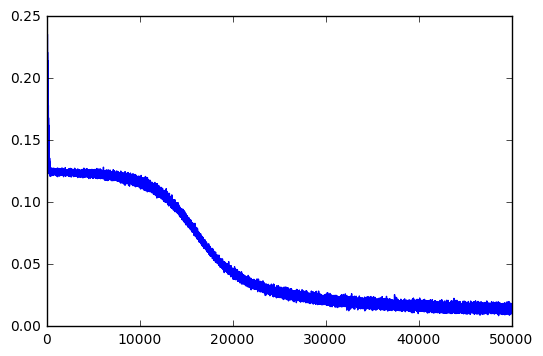

In [198]:
params = {
    'W1': np.random.randn(4,2),
    'B1': np.random.randn(1,4),
    'W2': np.random.randn(1,4),
    'B2': np.random.randn(1,1),
}

def train(X,y,learning_rate=0.1,num_iters=50000,batch_size=256):
    num_train = X.shape[0]
    losses = []
    for it in range(num_iters):
        X_batch = None
        y_batch = None
        
        random_indices = np.random.choice(num_train, batch_size)
        X_batch = X[random_indices]
        y_batch = y[random_indices]
        
        l, grads = loss(X_batch, y_batch)
        losses.append(l)
        
        # update parameters 
        params['W1'] += -learning_rate * grads['W1']
        params['B1'] += -learning_rate * grads['B1']
        params['W2'] += -learning_rate * grads['W2']
        params['B2'] += -learning_rate * grads['B2']
    
    return losses
losses = train(X,y.reshape(-1,1))
plt.plot(losses)

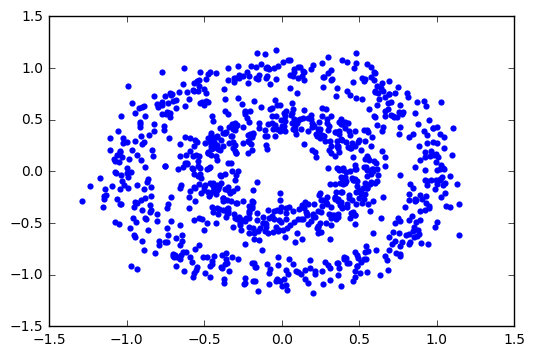

In [99]:
def predict(X):
    W1 = params['W1']
    B1 = params['B1']
    W2 = params['W2']
    B2 = params['B2']
    
    H = X.dot(W1.T)+B1
    H_a = sigmoid(H)
    output = H_a.dot(W2.T)+B2
    output_a = sigmoid(output)
    
    return output_a

X_new, _ = make_circles(n_samples=1000, factor=.5, noise=.1)
    
# genereate new data for prediction
# X_new, _ = generate_data(state=3)

y_pred = []
for i in range(len(X_new)):
    y_pred.append(predict(X_new[i]).round())
    
plt.scatter(X_new[:,0], X_new[:,1], linewidths=0, s=20);


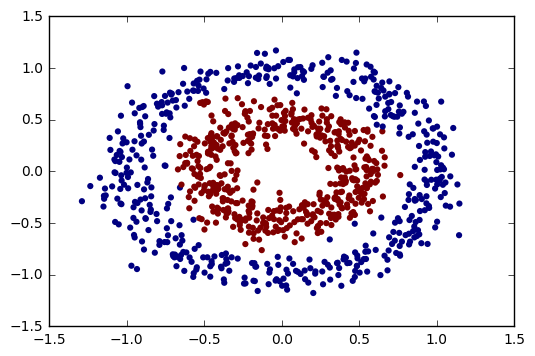

In [100]:
plt.scatter(X_new[:,0], X_new[:,1], c=y_pred, linewidths=0, s=20);

References:

- http://neuralnetworksanddeeplearning.com/

- http://cs231n.github.io/optimization-2/

- http://kineticmaths.com/index.php?title=Numerical_Differentiation

- https://google-developers.appspot.com/machine-learning/crash-course/backprop-scroll/

Click here to go back [Table of Content](#Table_of_Content).